In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
#Parte 1 Datos: Precipitaciones, Indicadores Económicos Banco Central
dataBC = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/banco_central.csv', sep=',')
dataBC.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [58]:
dataPrecipitaciones = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/precipitaciones.csv', sep=',')
dataPrecipitaciones.tail()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
491,1988-10-01,0.0,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.0,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.0,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.0,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419
495,1982-04-01,0.0,0.019610,6.848607,16.891752,28.904933,41.035299,47.870769,89.875426


In [4]:
#Parte 2 Análisis de datos. Creación de variables

#2.1 Análisis exploratorio

dataPrecipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [5]:
dataBC.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In [6]:
print(dataBC.shape)
print(dataPrecipitaciones.shape)

(614, 85)
(496, 9)


In [7]:
print(dataBC.isnull().any())

Periodo                                            False
Imacec_empalmado                                    True
Imacec_produccion_de_bienes                         True
Imacec_minero                                       True
Imacec_industria                                    True
                                                   ...  
Generacion_de_energia_electrica_CDEC_GWh            True
Indice_de_ventas_comercio_real_IVCM                 True
Indice_de_ventas_comercio_real_no_durables_IVCM     True
Indice_de_ventas_comercio_real_durables_IVCM        True
Ventas_autos_nuevos                                 True
Length: 85, dtype: bool


In [5]:
dataBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [19]:
# gran mayoria de las variables son Object a pesar de ser variables numericas

dataBC.replace("\D", np.nan, regex=True)


#dataBC['Imacec_empalmado'] = pd.to_numeric(dataBC['Imacec_empalmado'], errors='coerce')
#dataBC = dataBC.dropna(subset=['PIB_Pesca'])
#dataBC['PIB_Pesca'] = dataBC['PIB_Pesca'].astype(int)



#dataBC[1:84,].astype('float64').dtypes
#cols = dataBC.columns[dataBC.dtypes.eq('object')]
#print(cols)

cols = ['Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor_agregado',
       'Derechos_de_Importacion', 'PIB',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_kerosene_dolaresm3',
       'Tipo_de_cambio_del_dolar_observado_diario', 'Ocupados',
       'Ocupacion_en_Agricultura_INE',
       'Ocupacion_en_Explotacion_de_minas_y_canteras_INE',
       'Ocupacion_en_Industrias_manufactureras_INE',
       'Ocupacion_en_Suministro_de_electricidad_INE',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE',
       'Ocupacion_en_Actividades_profesionales_INE',
       'Ocupacion_en_Actividades_inmobiliarias_INE',
       'Ocupacion_en_Actividades_financieras_y_de_seguros_INE',
       'Ocupacion_en_Informacion_y_comunicaciones_INE',
       'Ocupacion_en_Transporte_y_almacenamiento_INE',
       'Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE',
       'Ocupacion_en_Construccion_INE', 'Ocupacion_en_Comercio_INE',
       'Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE',
       'Ocupacion_en_Administracion_publica_y_defensa_INE',
       'Ocupacion_en_Enseanza_INE',
       'Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE',
       'Ocupacion_en_Actividades_artisticas_INE',
       'Ocupacion_en_Otras_actividades_de_servicios_INE',
       'Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE',
       'Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE',
       'No_sabe__No_responde_Miles_de_personas',
       'Tipo_de_cambio_nominal_multilateral___TCM',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
       'Indice_de_produccion_industrial',
       'Indice_de_produccion_industrial__mineria',
       'Indice_de_produccion_industrial_electricidad__gas_y_agua',
       'Indice_de_produccion_industrial__manufacturera',
       'Generacion_de_energia_electrica_CDEC_GWh',
       'Indice_de_ventas_comercio_real_IVCM',
       'Indice_de_ventas_comercio_real_no_durables_IVCM',
       'Indice_de_ventas_comercio_real_durables_IVCM']

#dataBC[cols] = dataBC[cols].apply(pd.to_numeric, errors='coerce')




#dataBC.loc[dataBC['Periodo'] == '1972-07-01 00:00:00 UTC']

#dataBC['Imacec_empalmado'][25:35]*2


In [18]:
#dataBC.info()


#noooo
# Detectar strings en variables numericas 
cnt=0
for row in dataBC['Imacec_empalmado']:
    try:
        str(row)
        dataBC.loc[cnt, 'Imacec_empalmado']=np.nan
    except ValueError:
        pass
    cnt+=1
    

In [9]:
#dataBC.tail()

dataBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [7]:
# ver missing values (Banco central)

missing_count = dataBC.isnull().sum() # contador de missing values
value_count = dataBC.isnull().count() # contador de todos los values 
missing_percentage = round(missing_count / value_count * 100,2) #% de missing values
missing_df_dataBC = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df_dataBC)


                                                 count  percentage
Periodo                                              0        0.00
Imacec_empalmado                                   314       51.14
Imacec_produccion_de_bienes                        314       51.14
Imacec_minero                                      314       51.14
Imacec_industria                                   313       50.98
...                                                ...         ...
Generacion_de_energia_electrica_CDEC_GWh           350       57.00
Indice_de_ventas_comercio_real_IVCM                530       86.32
Indice_de_ventas_comercio_real_no_durables_IVCM    530       86.32
Indice_de_ventas_comercio_real_durables_IVCM       529       86.16
Ventas_autos_nuevos                                469       76.38

[85 rows x 2 columns]


Text(0.5, 1.0, 'Missing Values Banco Central.cvs')

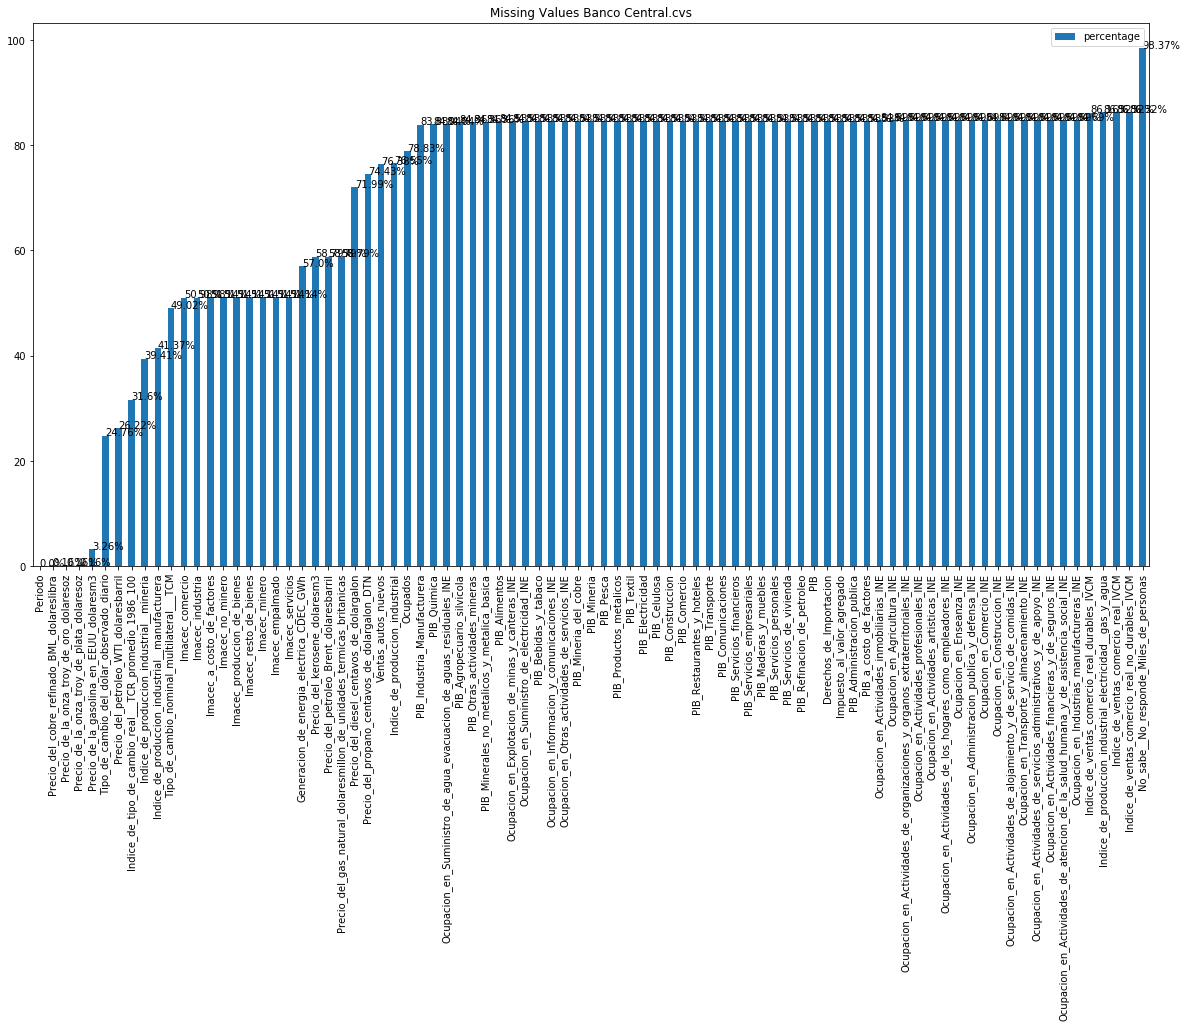

In [8]:
# missing values Banco central
missing_df_dataBC = missing_df_dataBC.sort_values('percentage')

#print(missing_df_dataBC)


barchart = missing_df_dataBC.plot.bar(y='percentage',figsize=(20,10))

missing_percentage_sorted= missing_df_dataBC['percentage']

#print(missing_percentage_sorted)

for index, percentage in enumerate(missing_percentage_sorted):
    barchart.text(index, percentage, str(percentage) + '%' )

plt.title('Missing Values Banco Central.cvs')    

In [7]:
# ver missing values (Precipitaciones)

missing_count2 = dataPrecipitaciones.isnull().sum() # contador de missing values
value_count2 = dataPrecipitaciones.isnull().count() # contador de todos los values 
missing_percentage2 = round(missing_count2 / value_count2 * 100,2) #% de missing values
missing_df_dataPrecipitaciones = pd.DataFrame({'count': missing_count2, 'percentage': missing_percentage2}) #create a dataframe
print(missing_df_dataPrecipitaciones)

                                     count  percentage
date                                     0         0.0
Coquimbo                                 0         0.0
Valparaiso                               0         0.0
Metropolitana_de_Santiago                0         0.0
Libertador_Gral__Bernardo_O_Higgins      0         0.0
Maule                                    0         0.0
Biobio                                   0         0.0
La_Araucania                             0         0.0
Los_Rios                                 0         0.0


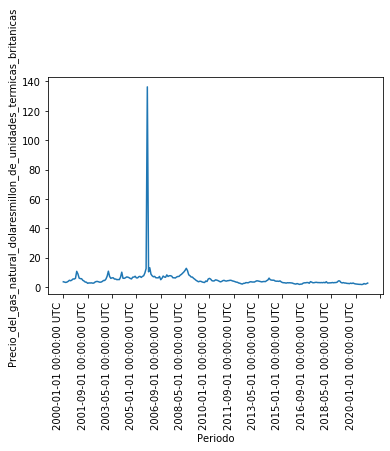

In [14]:
# no es necesario entonces graficar los missing values de la BBDD precipitaciones
dataBC = dataBC.sort_values('Periodo') #ordenar por fecha

plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x


figBC =  sns.lineplot(x="Periodo", y='Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
             data=dataBC)

figBC.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x

In [15]:
#duplicateRowsBC = dataBC[dataBC.duplicated('Periodo')]
#print(duplicateRowsBC)
#dataBC[duplicateRowsBC]


bool_series = dataBC["Periodo"].duplicated()
  
# displaying data
dataBC.head()
  
# display data
dataBC[bool_series]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
66,2018-08-01 00:00:00 UTC,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,...,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
79,2019-08-01 00:00:00 UTC,113.886.371,103.237.519,106.828.407,105.153.122,984.395.274,106.901.816,122.596.004,113.695.907,114.580.893,...,948.715.254,104.034.103,102.619.922,107.666.732,104.591.452,6598,116.203.109,107.385.297,15.342.321,33059.0


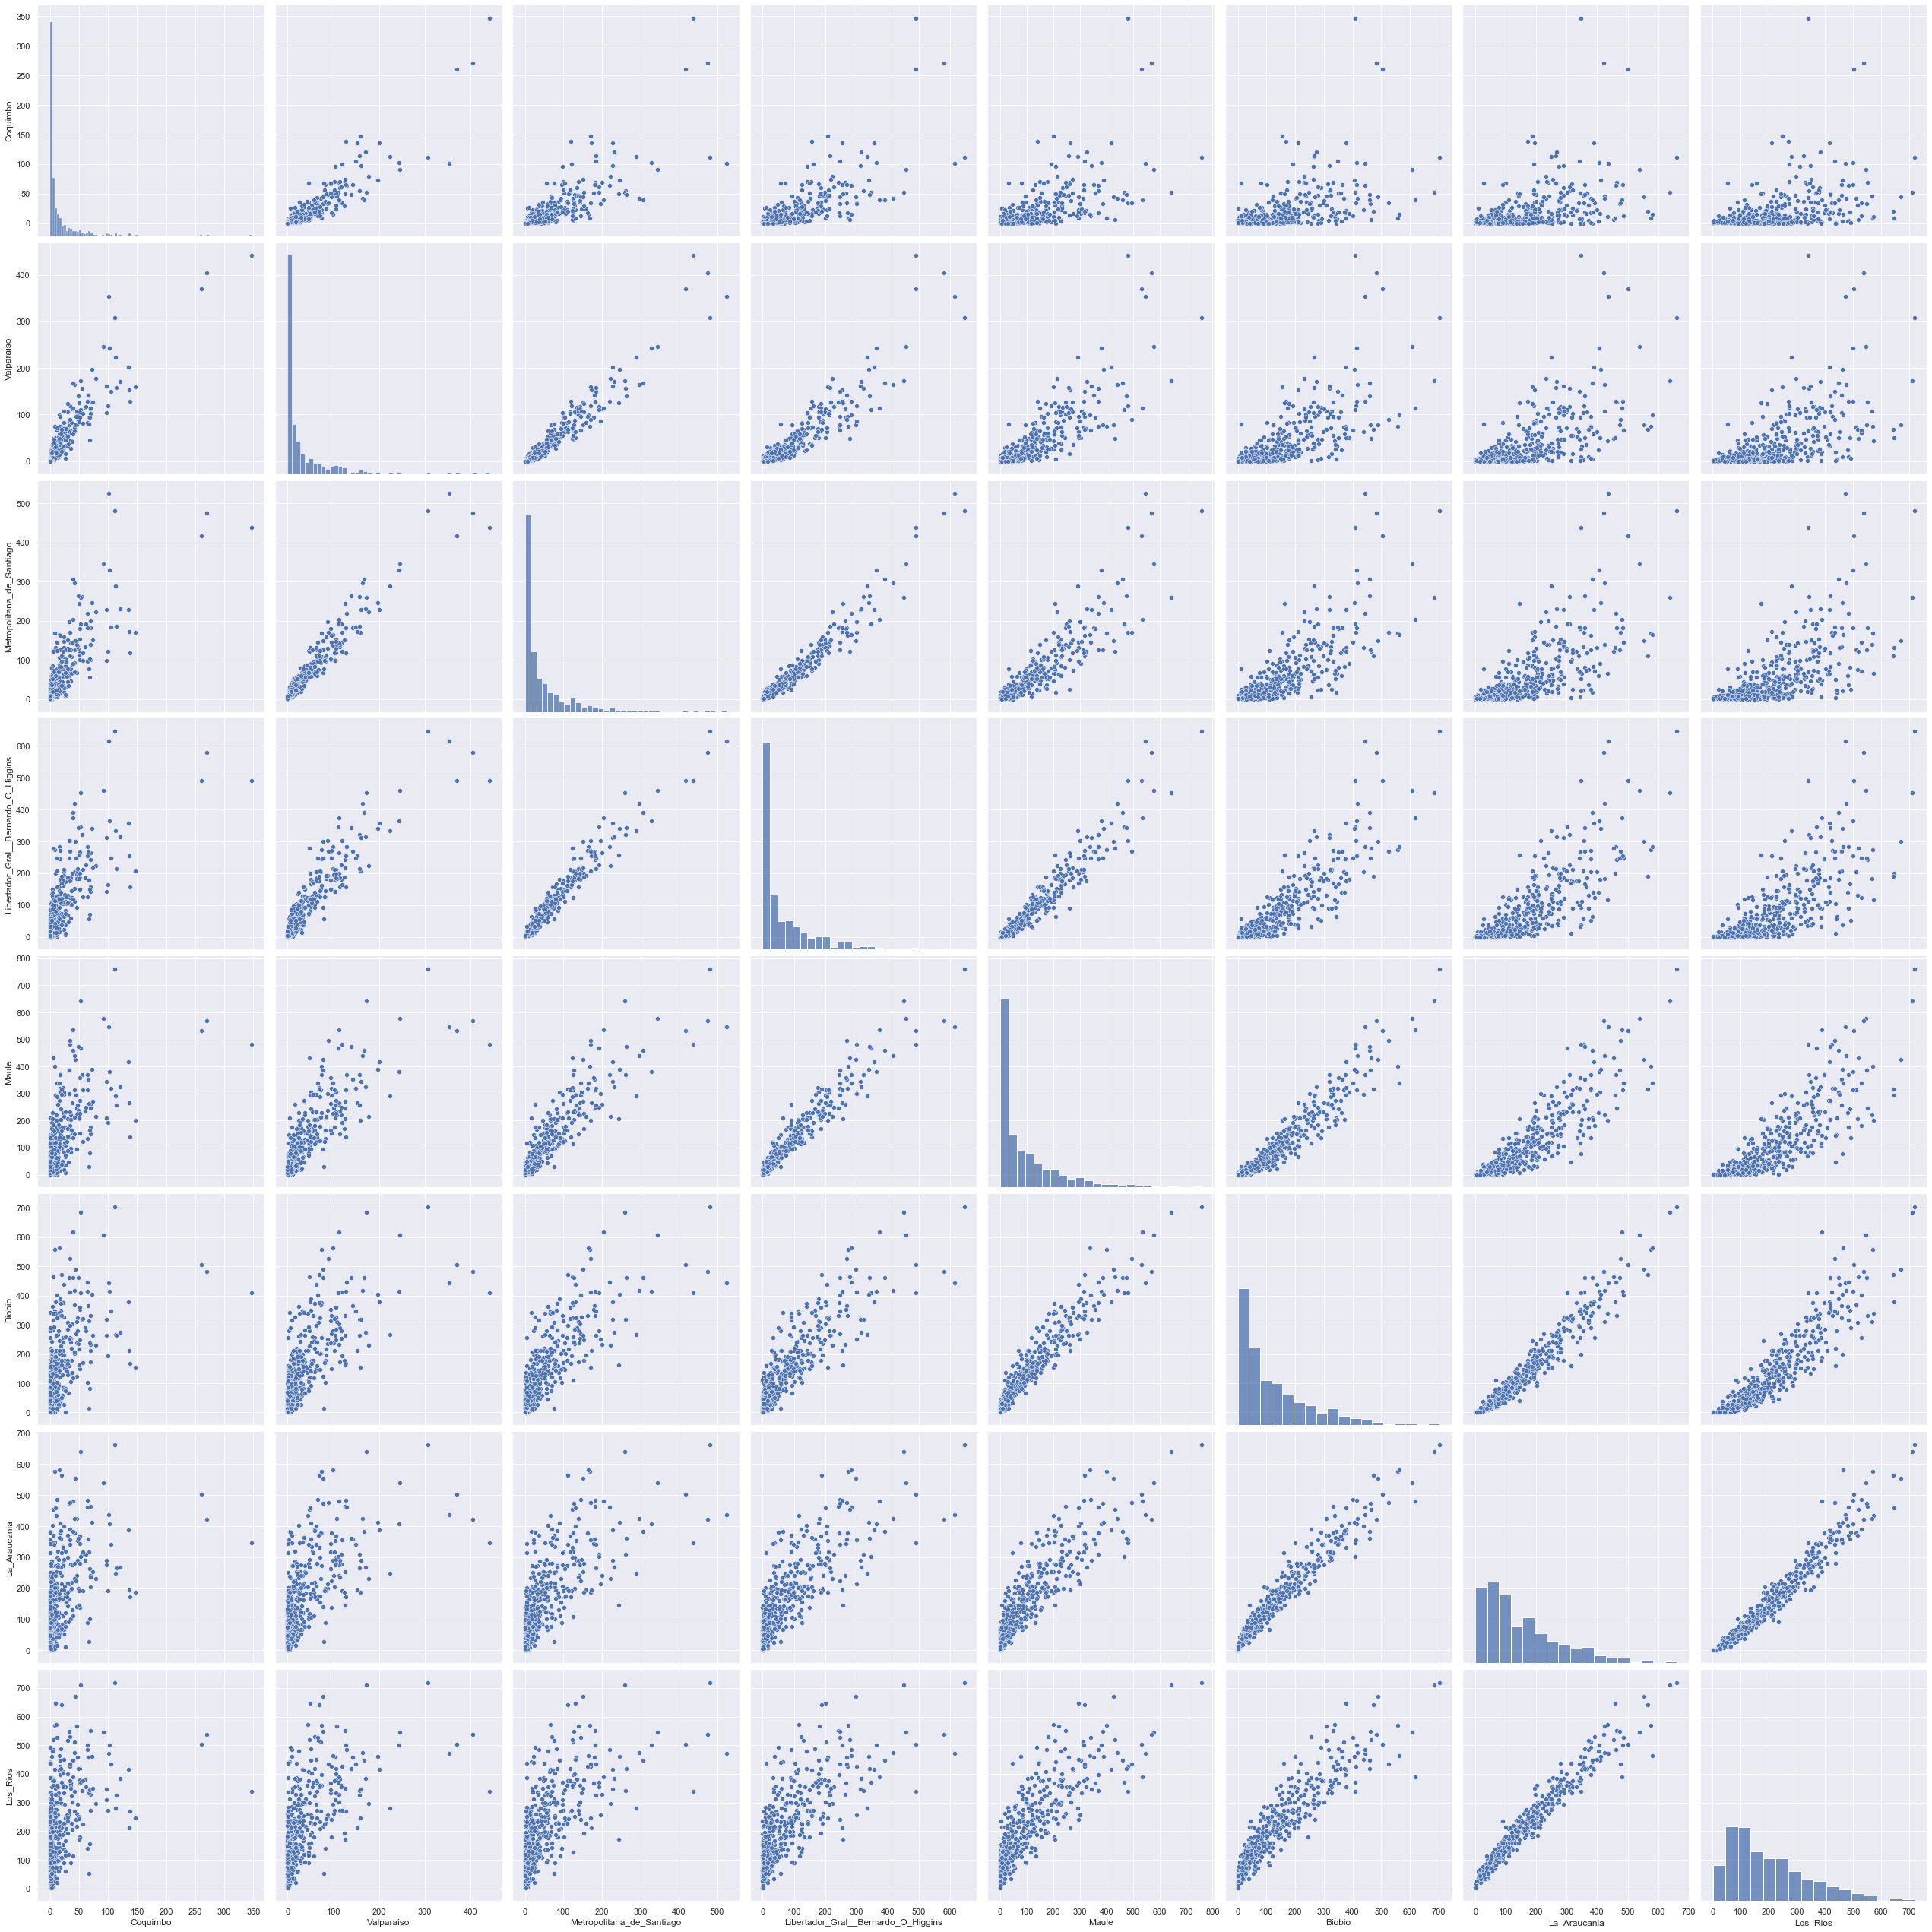

In [54]:
# precipitaciones

sns.set()
cols = ['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios']
sns.pairplot(dataPrecipitaciones[cols], height = 4.5)
plt.show();

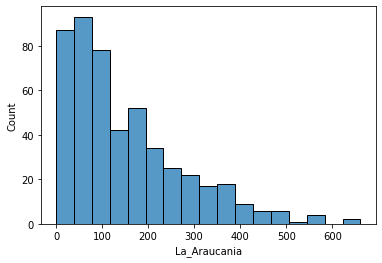

In [9]:
#histogram
sns.histplot(dataPrecipitaciones['La_Araucania'])

In [77]:
dataPrecipitaciones = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/precipitaciones.csv', sep=',')
dataPrecipitaciones.tail()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
491,1988-10-01,0.0,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.0,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.0,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.0,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419
495,1982-04-01,0.0,0.019610,6.848607,16.891752,28.904933,41.035299,47.870769,89.875426


In [82]:
dataPrecipitaciones['date']=pd.to_datetime(dataPrecipitaciones['date']) #pasar de string a datetype

dataPrecipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 496 non-null    datetime64[ns]
 1   Coquimbo                             496 non-null    float64       
 2   Valparaiso                           496 non-null    float64       
 3   Metropolitana_de_Santiago            496 non-null    float64       
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64       
 5   Maule                                496 non-null    float64       
 6   Biobio                               496 non-null    float64       
 7   La_Araucania                         496 non-null    float64       
 8   Los_Rios                             496 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 35.0 KB


In [181]:


#greater than the start date and smaller than the end date
#mask = (dataPrecipitaciones['date'] > start_date) & (dataPrecipitaciones['date'] <= end_date)
#mask = (dataPrecipitaciones['date'] > '1979-11-01') & (dataPrecipitaciones['date'] <= '1980-07-01')
#dataPrecipitaciones.loc[mask]

#dataPrecipitaciones['conce'][10:20]
#borde_inferior=pd.to_datetime('1979-01-01', format='%Y-%m-%d', errors='ignore')


date_string='1979-01-01'

borde_inferior = datetime.strptime(date_string, '%Y-%m-%d')

borde_inferior
#dataPrecipitaciones.tail()

datetime.datetime(1979, 1, 1, 0, 0)

In [117]:
def GraficoRegionFecha(region, fecha_de_inicio, fecha_de_termino):
    global dataPrecipitaciones
    
    
    mask = (dataPrecipitaciones['date'] > fecha_de_inicio) & (dataPrecipitaciones['date'] <= fecha_de_termino)
    dataPrecipitaciones.loc[mask] #filtro de fecha
    
    
    sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
    plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x

    df_melted = dataPrecipitaciones.loc[mask].melt("date",var_name="Region",value_name="Precipitacion") # transformacion DB en 3 variables



    fig =  sns.lineplot(x="date", y='Precipitacion', hue="Region",data=df_melted[df_melted["Region"].isin([region])]) #grafico

    fig.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x

In [190]:
def GraficoRegionFecha2(region, fecha_de_inicio, fecha_de_termino):
    global dataPrecipitaciones
    
    #fecha_de_inicio=pd.to_datetime(fecha_de_inicio)
    #fecha_de_termino=pd.to_datetime(fecha_de_termino)
    
    borde_inferior='1979-01-01'
    borde_superior='2020-04-01'
        
    #lista=['1979-01-01','2020-04-01']
    # (fecha_de_inicio > '1979-01-01') & (fecha_de_inicio <= '2020-04-01') and (fecha_de_inicio <fecha_de_termino) and (fecha_de_termino <= '2020-04-01')
    
    if region in dataPrecipitaciones.columns:
        
        mask = (dataPrecipitaciones['date'] > fecha_de_inicio) & (dataPrecipitaciones['date'] <= fecha_de_termino)
        dataPrecipitaciones.loc[mask] #filtro de fecha


        sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
        plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x

        df_melted = dataPrecipitaciones.loc[mask].melt("date",var_name="Region",value_name="Precipitacion") # transformacion DB en 3 variables



        fig =  sns.lineplot(x="date", y='Precipitacion', hue="Region",data=df_melted[df_melted["Region"].isin([region])]) #grafico

        fig.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x
        
        
        
    else:
                    
        print('Valor no existe en la BBDD')

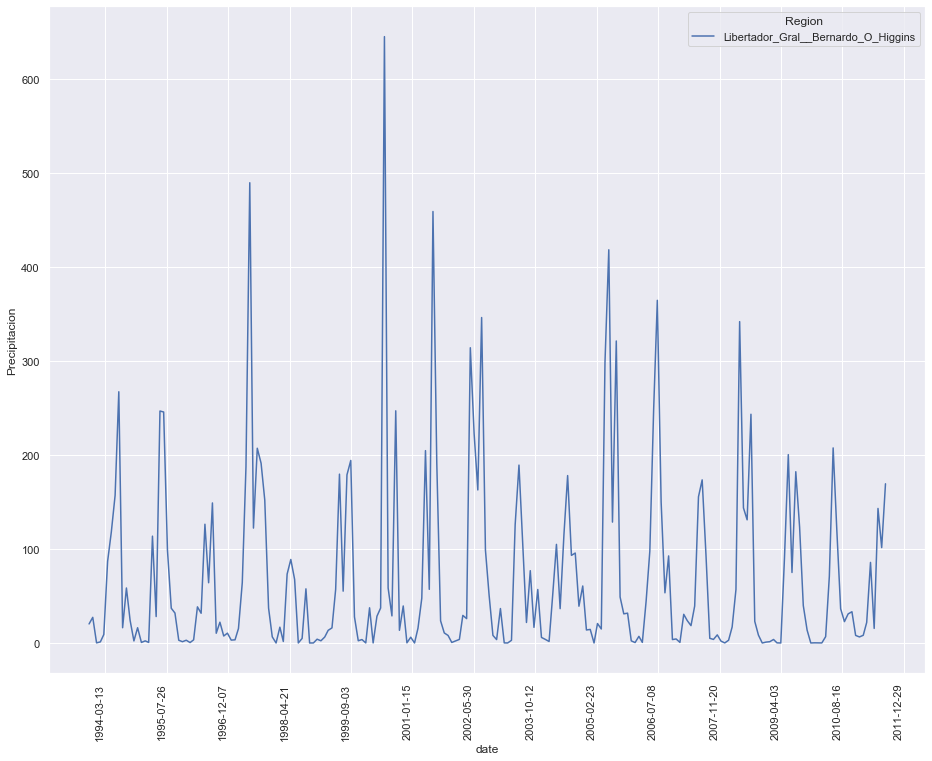

In [192]:
GraficoRegionFecha2('Libertador_Gral__Bernardo_O_Higgins', '1993-10-07', '2011-08-01')

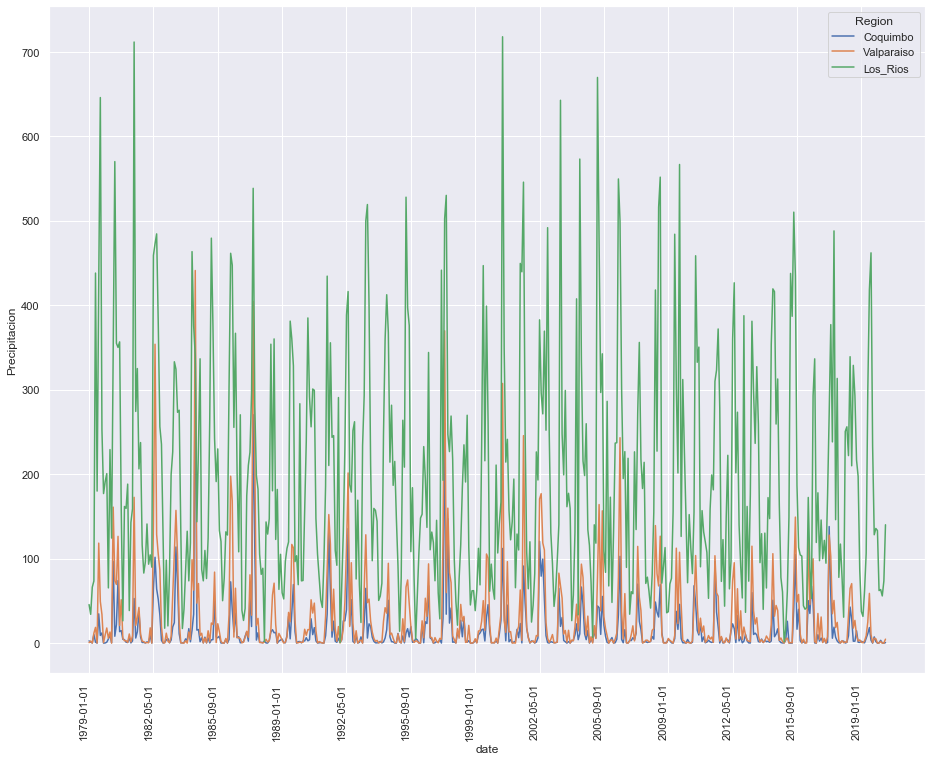

In [25]:
dataPrecipitaciones = dataPrecipitaciones.sort_values('date') #ordenar por fecha

sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x

df_melted = dataPrecipitaciones.melt("date",var_name="Region",value_name="Precipitacion") # transformacion DB en 3 variables

# grafico 1
# cols = ['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
#       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
#       'La_Araucania', 'Los_Rios']

# 1988-10-01
# 2019-08-01


fig =  sns.lineplot(x="date", y='Precipitacion', hue="Region",
             data=df_melted[df_melted["Region"].isin(["Coquimbo", "Los_Rios",'Valparaiso'])])

fig.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x

In [122]:
df_melted.tail()


,date,Region,Precipitacion
3963,2019-12-01,Los_Rios,62.170090
3964,2020-01-01,Los_Rios,63.389625
3965,2020-02-01,Los_Rios,55.838889
3966,2020-03-01,Los_Rios,73.640866
3967,2020-04-01,Los_Rios,140.076757
